# Grupo: 3
Bruno Dueñas, Fernando Mejía, Mateo Córdova

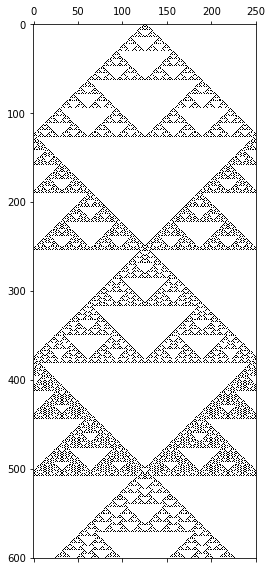

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rule_to_binary(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]

def get_neighborhood(CA, cell_i):
    # CA: cellular automata
    return ''.join(CA[cell_i-1:cell_i+2].astype('str'))

def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1, CA is in time t

    # Leave out the extemes
    for cell_i in range(1, len(CA)-1):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

def wolfram_initialization(size):
    CA = np.zeros(size, dtype='int')
    CA[len(CA)//2] = 1
    return CA

size = 251  # size of the automata
steps = 600  # time steps
rule = 90  # decimal rule
binary_rule = rule_to_binary(rule)
# init automata
CA = [wolfram_initialization(size)]
# Evolve in time (steps)
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]

plt.matshow(CA, cmap='binary')

In [2]:
size = 251
p = [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]
CA = np.zeros(size, dtype='int')
ran = np.random.choice(2,251, p = [0.1,0.9])
#Primer parametro probabilidad para 0, Segundo p para 1
ran

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

# Inicialización al azar
$p\in\{0.25, 0.5, 0.75\}$

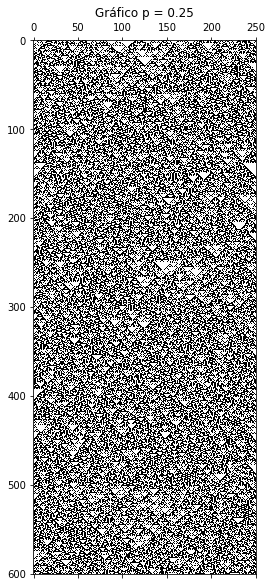

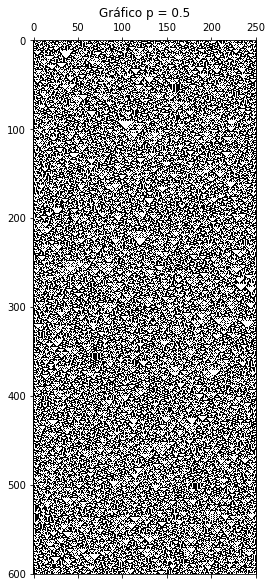

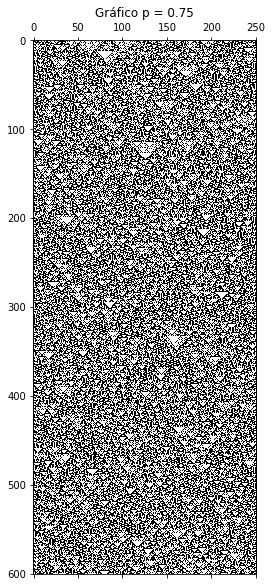

In [3]:
size = 251  # size of the automata
steps = 600  # time steps
rule = 90  # decimal rule
p = [0.25, 0.5, 0.75]
binary_rule = rule_to_binary(rule)

for i in range(len(p)):
    # init automata
    CA = np.zeros(size, dtype='int')
    CA = [np.random.choice(2,size, p = [1-p[i],p[i]])]

    # Evolve in time (steps)
    for t in range(steps):
        CA += [update_automata(CA[-1], binary_rule)]
    plt.matshow(CA, cmap='binary')
    plt.title('Gráfico p = ' + str(p[i]))

# Bordes
Bordes envueltos

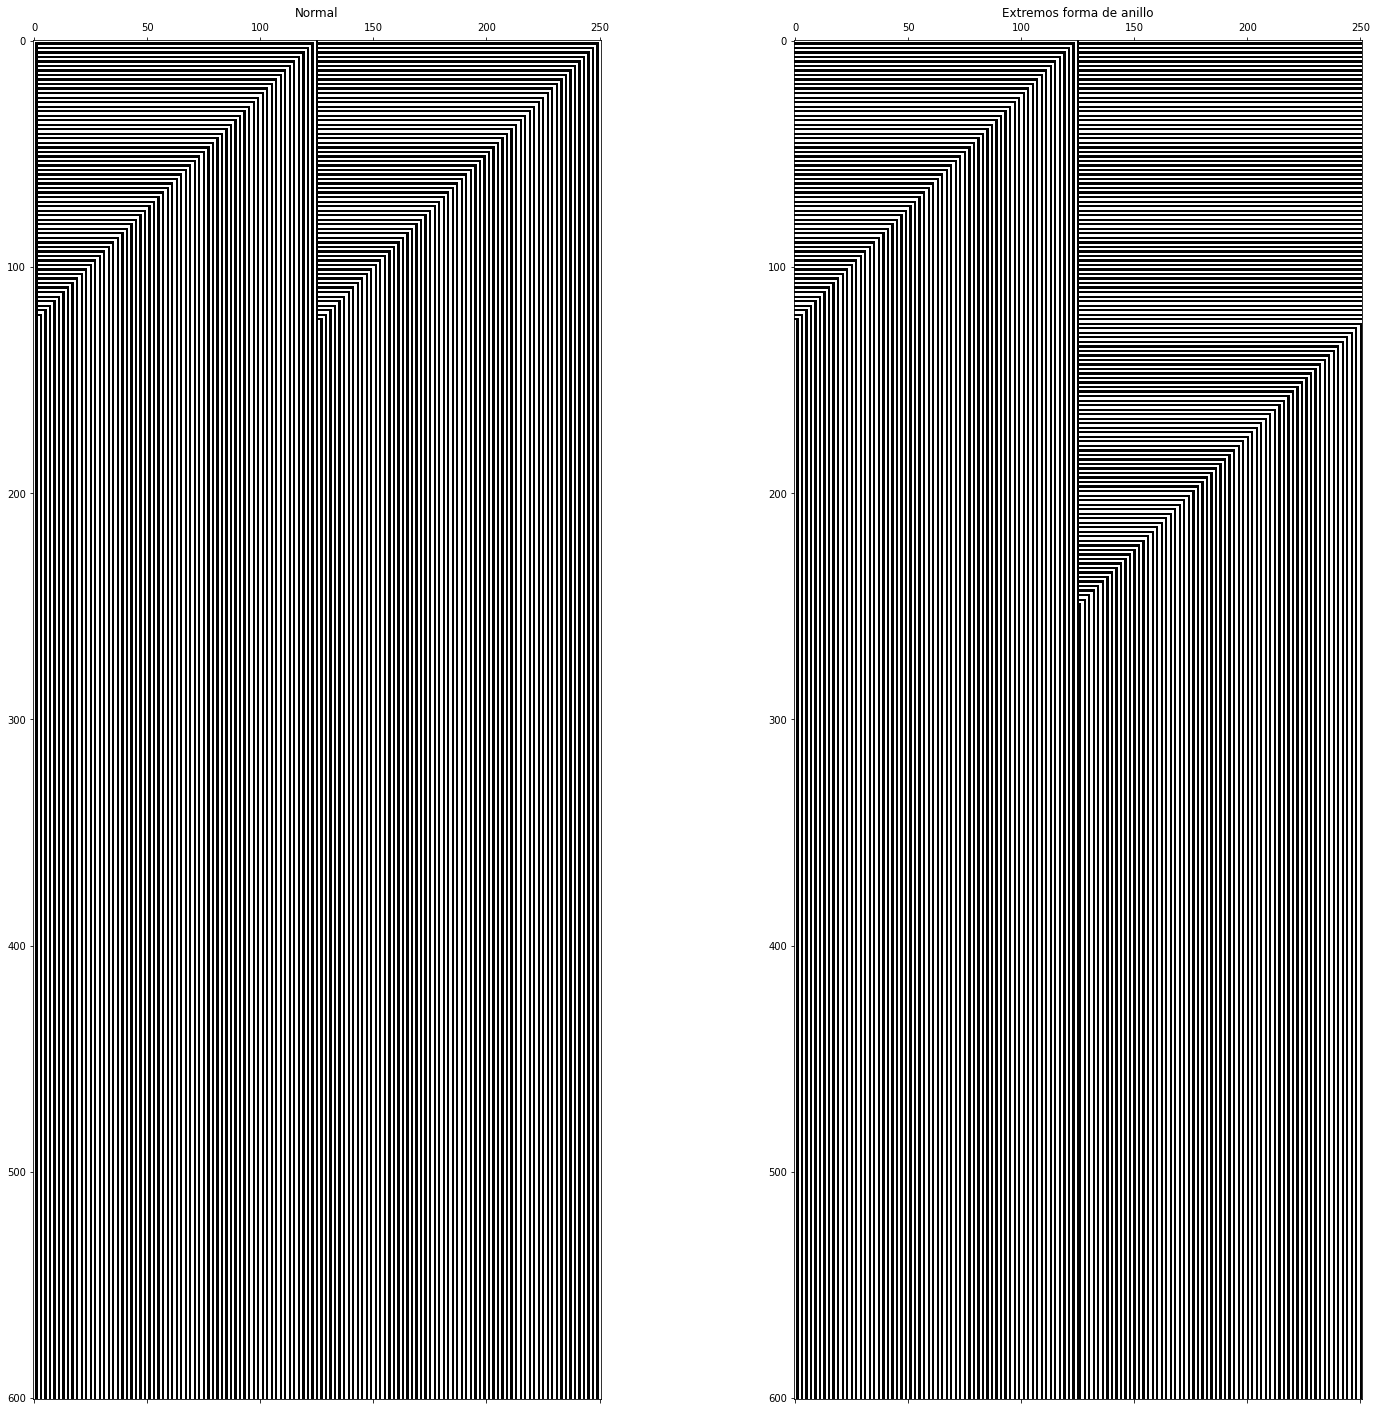

In [4]:
import matplotlib.pyplot as plt

def rule_to_binary(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]

def get_neighborhood(CA, cell_i):
    # CA: cellular automata
    return ''.join(CA[cell_i-1:cell_i+2].astype('str'))

def get_neighborhoodBegin(CA, cell_i):
    # CA: cellular automata
    BE = CA[-1],CA[0], CA[1]
    CA2 = np.asarray(BE)
    return ''.join(CA2[0:3].astype('str'))

def get_neighborhoodLast(CA, cell_i):
    # CA: cellular automata
    BE = CA[0],CA[-1], CA[-2]
    CA2 = np.asarray(BE)
    return ''.join(CA2[0:3].astype('str'))

def update_automata_ring(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1, CA is in time t

    # Leave out the extemes
    for cell_i in range(0, len(CA)):
        if(cell_i == 0):
            CAU[cell_i] = binary_rule[int(get_neighborhoodBegin(CA, cell_i), 2)]
        elif (cell_i == (len(CA)-1)):
            CAU[cell_i] = binary_rule[int(get_neighborhoodLast(CA, cell_i), 2)]
        else:
            CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1, CA is in time t

    # Leave out the extemes
    for cell_i in range(1, len(CA)-1):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]

    return CAU

def wolfram_initialization(size):
    CA = np.zeros(size, dtype='int')
    CA[len(CA)//2] = 1
    return CA

size = 251  # size of the automata
steps = 600  # time steps
rule = 93  # decimal rule
binary_rule = rule_to_binary(rule)
# init automata
CA = [wolfram_initialization(size)]
CA2 = [wolfram_initialization(size)]
# Evolve in time (steps)
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]
    CA2 += [update_automata_ring(CA2[-1], binary_rule)]



fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(25,25))
ax1.set_title('Normal')
ax1.matshow(CA, cmap='binary')
ax2.set_title('Extremos forma de anillo')
ax2.matshow(CA2, cmap='binary')


# Actualización asíncrona

Random independent scheme

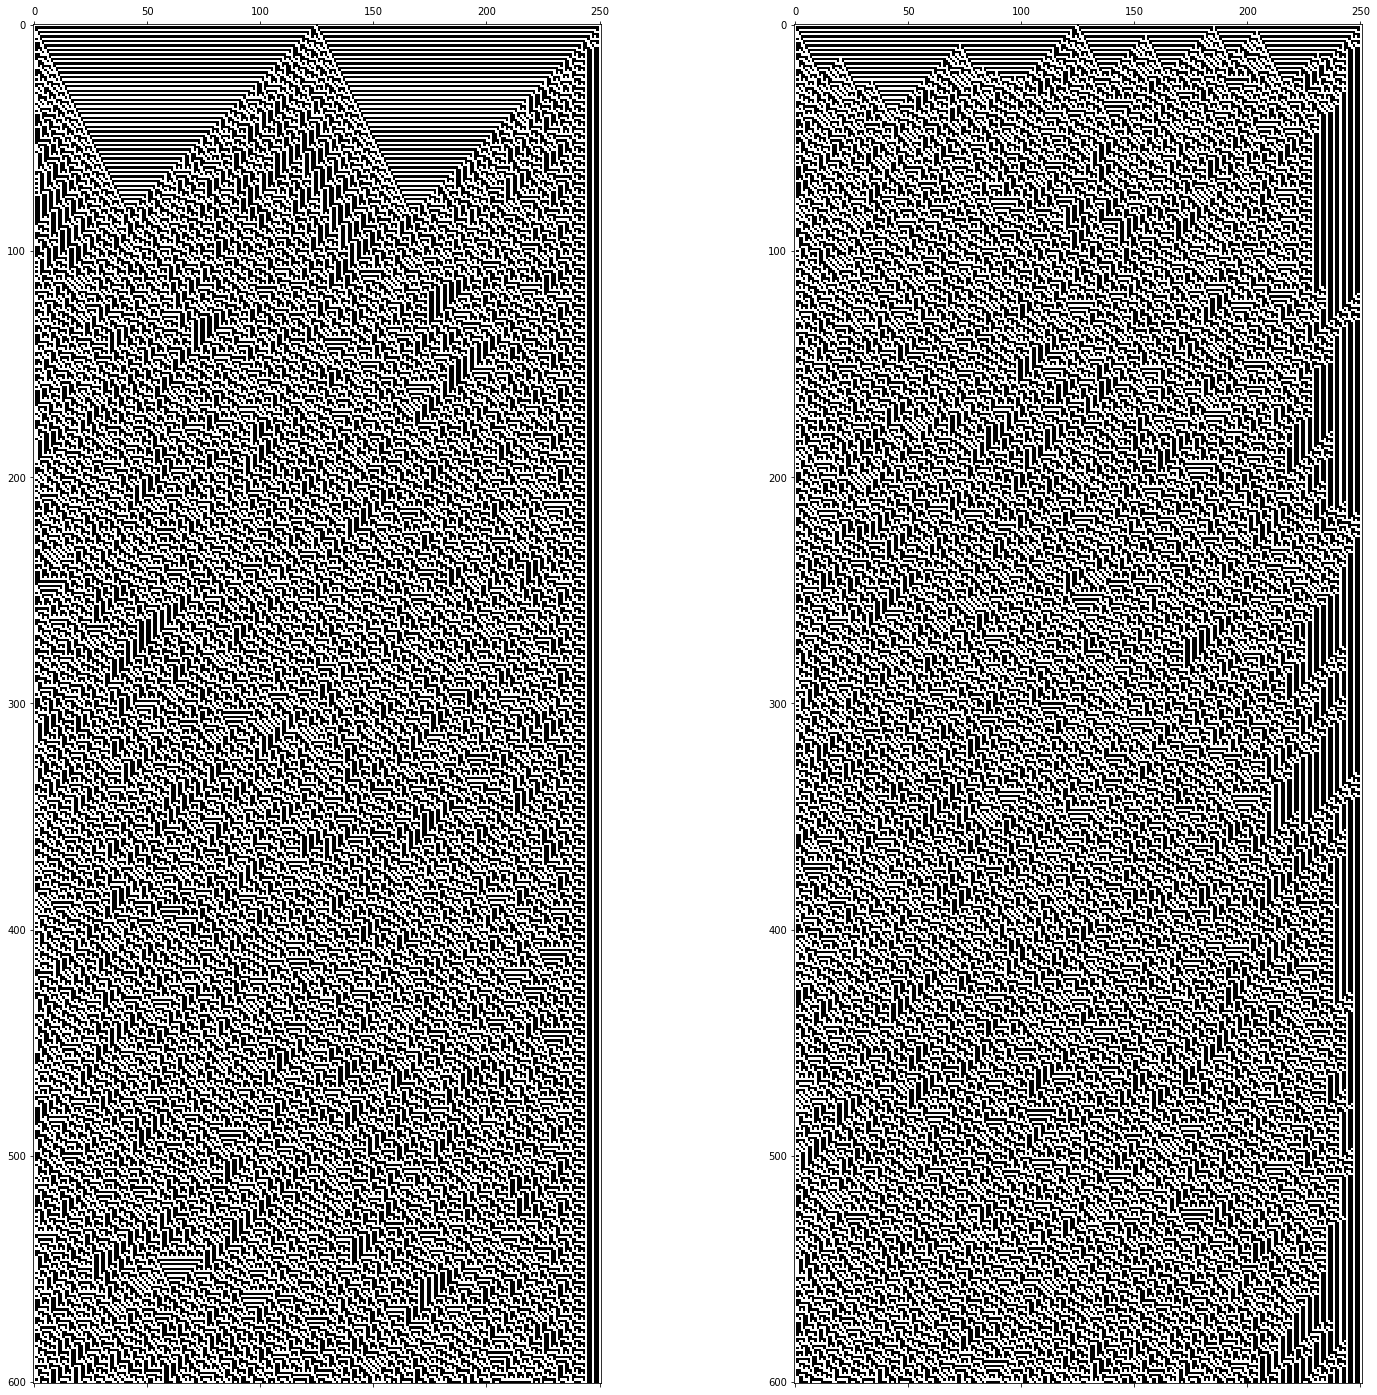

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def rule_to_binary(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]

def get_neighborhood(CA, cell_i):
    # CA: cellular automata
    return ''.join(CA[cell_i-1:cell_i+2].astype('str'))

def update_automata(CA, binary_rule):
    CAU = CA.copy()  # CAU, state in t+1, CA is in time t

    # Leave out the extemes
    for cell_i in range(1, len(CA)-1):
        CAU[cell_i] = binary_rule[int(get_neighborhood(CA, cell_i), 2)]
    #CAU[np.random.randint(1, len(CA)-1)] = np.random.randint(0, 1)
    return CAU

def update_automata2(CA2, binary_rule2):
    CAU = CA2.copy()  # CAU, state in t+1, CA is in time t

    # Leave out the extemes
    for cell_i in range(1, len(CA2) - 1):
        CAU[cell_i] = binary_rule2[int(get_neighborhood(CA2, cell_i), 2)]
    CAU[np.random.randint(0, len(CAU))] = np.random.randint(0, 1)
    return CAU

def wolfram_initialization(size):
    CA = np.zeros(size, dtype='int')
    CA[len(CA)//2] = 1
    return CA

size = 251  # size of the automata
steps = 600  # time steps
rule = 89  # decimal rule
binary_rule = rule_to_binary(rule)
# init automata
CA = [wolfram_initialization(size)]
CA2 = [wolfram_initialization(size)]

# Evolve in time (steps)
for t in range(steps):
    CA += [update_automata(CA[-1], binary_rule)]
    CA2 += [update_automata2(CA2[-1], binary_rule)]

#plt.matshow(CA, cmap='binary')
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(25,25))
ax1.matshow(CA, cmap='binary')
ax2.matshow(CA2, cmap='binary')